# Notebook Purpose: Load Yolov3 pre-trained weights and run inference on sample image 

## Imports

In [6]:
#download pre-trained weights 
!mkdir weights
!curl https://pjreddie.com/media/files/yolov3.weights -O weights/yolov3.weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  236M  100  236M    0     0   333k      0  0:12:06  0:12:06 --:--:--  586k      0  0:07:48  0:00:06  0:07:42  582k0   536k      0  0:07:31  0:00:09  0:07:22  582k   559k      0  0:07:12  0:01:14  0:05:58  582k   560k      0  0:07:11  0:02:12  0:04:59  582k6M    0     0   561k      0  0:07:11  0:02:17  0:04:54  579k61k      0  0:07:11  0:02:24  0:04:47  569k20  0:03:26  0:03:54  576k0:05:03  0:03:46  246k    0   431k      0  0:09:21  0:05:37  0:03:44  172k 0:09:40  0:06:02  0:03:38  278k 0:10:10  0:06:51  0:03:19  285k:16  0:07:01  0:03:15  230k   0     0   385k      0  0:10:29  0:07:31  0:02:58  322k0:58  0:08:44  0:02:14  253k     0   358k      0  0:11:15  0:09:22  0:01:53  178kk      0  0:11:33  0:10:01  0:01:32  224k  348k      0  0:11:34  0:10:04  0:01:30  249k    0   340k      0  0:11:52  0:10:56  0:00:56  159k     0   33

In [11]:
!python convert.py --weights weights/yolov3.weights --output weights/yolov3.tf

2021-10-01 21:51:44.181077: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
yolo_darknet (Functional)       ((None, None, None,  40620640    input_1[0][0]                    
__________________________________________________________________________________________________
yolo_conv_0 (Functional)        (None, None, Non

I1001 21:51:49.832236 4656659904 utils.py:31] yolo_conv_0/conv2d_56 bn
I1001 21:51:49.846382 4656659904 utils.py:31] yolo_output_0/conv2d_57 bn
I1001 21:51:50.028352 4656659904 utils.py:31] yolo_output_0/conv2d_58 bias
I1001 21:51:50.036964 4656659904 utils.py:31] yolo_conv_1/conv2d_59 bn
I1001 21:51:50.050040 4656659904 utils.py:31] yolo_conv_1/conv2d_60 bn
I1001 21:51:50.063557 4656659904 utils.py:31] yolo_conv_1/conv2d_61 bn
I1001 21:51:50.127151 4656659904 utils.py:31] yolo_conv_1/conv2d_62 bn
I1001 21:51:50.154353 4656659904 utils.py:31] yolo_conv_1/conv2d_63 bn
I1001 21:51:50.249345 4656659904 utils.py:31] yolo_conv_1/conv2d_64 bn
I1001 21:51:50.257773 4656659904 utils.py:31] yolo_output_1/conv2d_65 bn
I1001 21:51:50.324807 4656659904 utils.py:31] yolo_output_1/conv2d_66 bias
I1001 21:51:50.334309 4656659904 utils.py:31] yolo_conv_2/conv2d_67 bn
I1001 21:51:50.348154 4656659904 utils.py:31] yolo_conv_2/conv2d_68 bn
I1001 21:51:50.370270 4656659904 utils.py:31] yolo_conv_2/conv2d_

In [ ]:
#install other required packages 
!pip install opencv-contrib-python tensorflow matplotlib

In [3]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
from models import YoloV3
from utils import draw_outputs, transform_images
import matplotlib.pyplot as plt

CLASSES_PATH = './coco.names'
WEIGHTS_PATH = './weights/yolov3.tf'
IMAGE_SIZE = 416

## Load the model, the classes and the example image

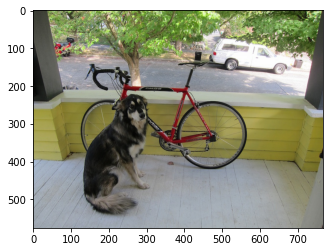

In [12]:
#creating YoloV3 object instance
yolo = YoloV3()
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('./dog_example.jpg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

## Run inference and display result

	dog, 0.9977410435676575, [0.15920368 0.38621816 0.41723308 0.9451945 ]
	bicycle, 0.9901672005653381, [0.1532267  0.21770424 0.7412542  0.7511743 ]
	truck, 0.9378406405448914, [0.6156052  0.15119573 0.901889   0.2891039 ]


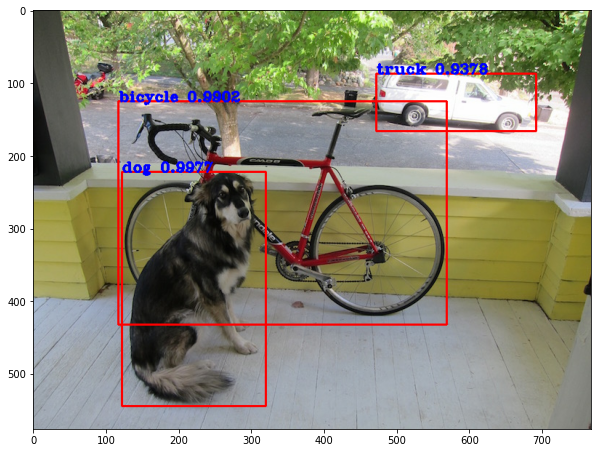

In [13]:
boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)

### Next Steps: Train model on road distress dataset in order to produce updated weights .pt file that can be loaded into yolo object instance leveraging same code shown here